In [1]:
# Importing the libraries

# Data manipulation
import numpy as np
import pandas as pd
from numpy import log

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing data
data_1=pd.read_csv("2015_Financial_Data.csv")
data_2=pd.read_csv("2016_Financial_Data.csv")
data_3=pd.read_csv("2017_Financial_Data.csv")
data_4=pd.read_csv("2018_Financial_Data.csv")

In [3]:
print("Shape of data for Year 2015 is {}".format(data_1.shape))
print("Shape of data for Year 2016 is {}".format(data_2.shape))
print("Shape of data for Year 2017 is {}".format(data_3.shape))
print("Shape of data for Year 2018 is {}".format(data_4.shape))

Shape of data for Year 2015 is (3808, 225)
Shape of data for Year 2016 is (4797, 225)
Shape of data for Year 2017 is (4960, 225)
Shape of data for Year 2018 is (4392, 225)


# EDA on P&G only

In [4]:
# Considering Procter & Gamble company only 
data_1 = data_1[data_1['Unnamed: 0'] =='PG' ]
data_2 = data_2[data_2['Unnamed: 0'] =='PG' ]
data_3 = data_3[data_3['Unnamed: 0'] =='PG' ]
data_4 = data_4[data_4['Unnamed: 0'] =='PG' ]

In [5]:
df = data_1.append([data_2,data_3,data_4])
df.fillna(0,inplace=True)
df.index = [2015,2017,2018,2019]

Mean of Quick Ratio for P&G last 4 year is 0.58 


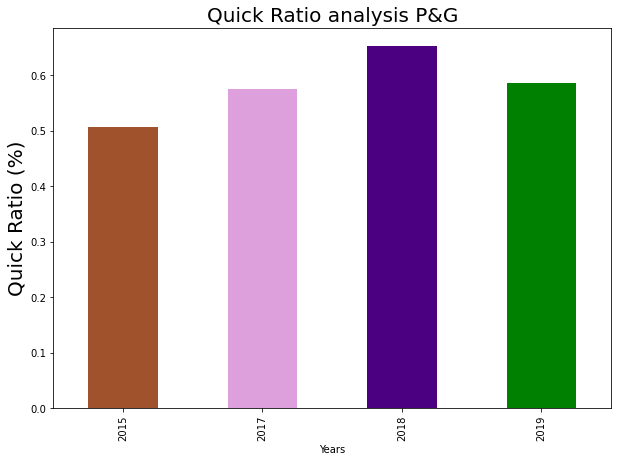

In [6]:
print("Mean of Quick Ratio for P&G last 4 year is {:.2f} ".format(df['quickRatio'].mean()))
col = ['sienna', 'plum', 'indigo', 'green']
plt.figure(figsize=(10, 7))
df['quickRatio'].plot.bar(color=col)
plt.xlabel('Years')
plt.ylabel('Quick Ratio (%)', fontsize=20)
plt.title('Quick Ratio analysis P&G', fontsize=20)
plt.grid(False)
plt.show()

Mean of Quick Ratio for P&G last 4 year is 0.93 


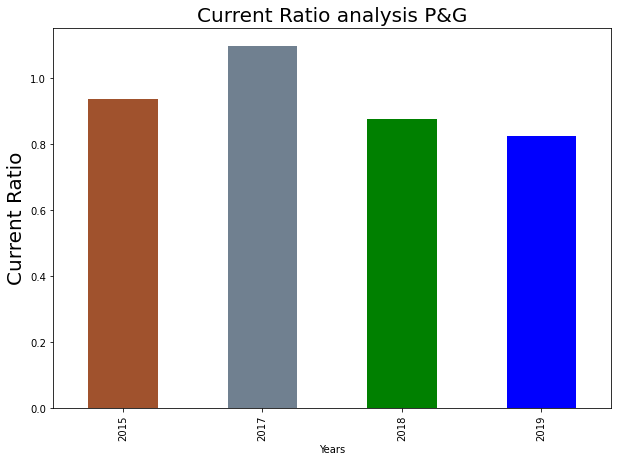

In [7]:
# Current ratio
col = ['sienna', 'slategrey', 'green', 'blue']
print("Mean of Quick Ratio for P&G last 4 year is {:.2f} ".format(df['currentRatio'].mean()))
plt.figure(figsize=(10, 7))
df['currentRatio'].plot.bar(color = col)
plt.xlabel('Years')
plt.ylabel('Current Ratio', fontsize=20)
plt.title('Current Ratio analysis P&G', fontsize=20)
plt.grid(False)
plt.show()

Mean of Debt to Equity  Ratio for P&G last 4 year is 0.55 


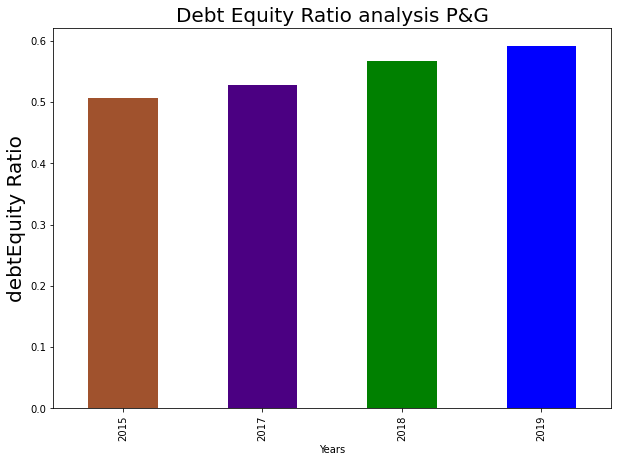

In [8]:
# Debt to Equity ratio
branch_col = ['sienna', 'indigo', 'green', 'blue']
print("Mean of Debt to Equity  Ratio for P&G last 4 year is {:.2f} ".format(df['debtEquityRatio'].mean()))
plt.figure(figsize=(10, 7))
df['debtEquityRatio'].plot.bar(color = branch_col)
plt.xlabel('Years')
plt.ylabel('debtEquity Ratio', fontsize=20)
plt.title('Debt Equity Ratio analysis P&G', fontsize=20)
plt.grid(False)
plt.show()

Mean of Inventory Turnover for P&G last 5 year is 13.14 


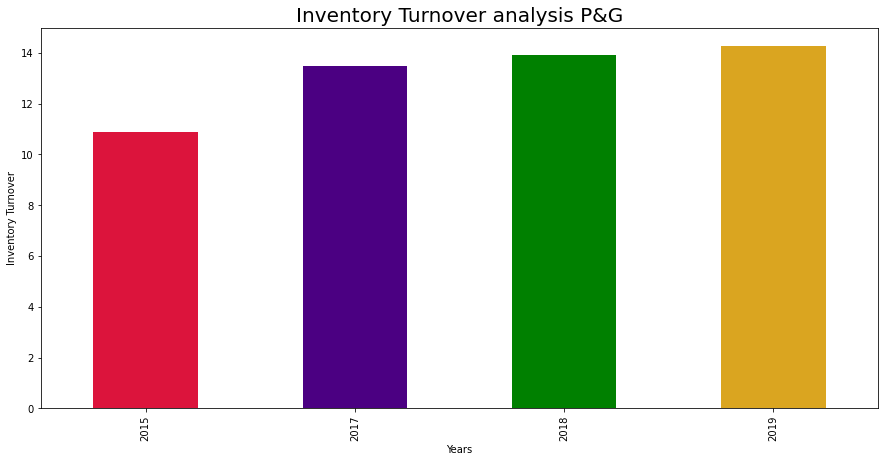

In [9]:
# Return on equity
branch_col = ['crimson', 'indigo', 'green', 'goldenrod']
print("Mean of Inventory Turnover for P&G last 5 year is {:.2f} ".format(df['inventoryTurnover'].mean()))
plt.figure(figsize=(15, 7))
df['inventoryTurnover'].plot.bar(color = branch_col)
plt.xlabel('Years')
plt.ylabel('Inventory Turnover')
plt.title('Inventory Turnover analysis P&G', fontsize=20)
plt.grid(False)
plt.show()

Mean of short Term assest for P&G last 5 year is 41158750000.00 


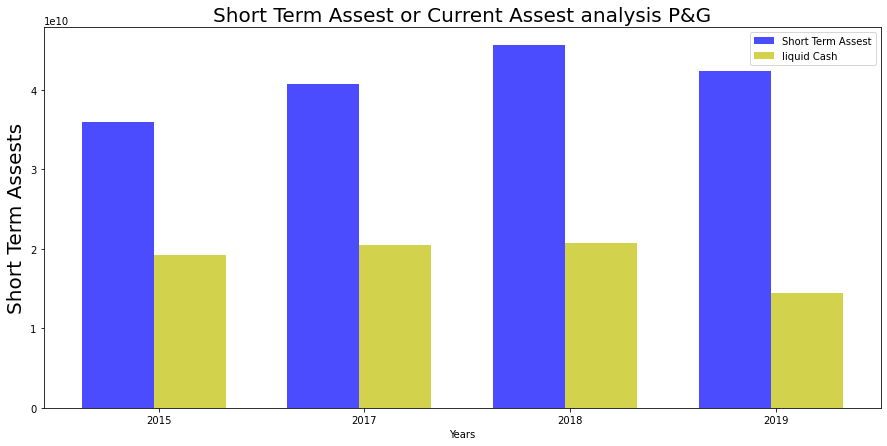

In [10]:
df['ShortTermAssest'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']+df['Inventories']+df['Average Receivables']\
                        + df['Investments']+df['Investment purchases and sales']+df['Short-term investments']

df['liquidcash'] = df['Cash and cash equivalents'] + df['Cash and short-term investments']


# Short Term Assets
n_year = 4
index = np.arange(n_year)
bar_width = 0.35
opacity = 0.7

print("Mean of short Term assest for P&G last 5 year is {:.2f} ".format(df['ShortTermAssest'].mean()))

plt.figure(figsize=(15, 7))
plt.bar(index,df['ShortTermAssest'],bar_width,alpha=opacity,color='b',label='Short Term Assest')
plt.bar(index+bar_width,df['liquidcash'],bar_width,alpha=opacity,color='y',label='liquid Cash')
plt.xlabel('Years')
plt.ylabel('Short Term Assests', fontsize=20)
plt.title('Short Term Assest or Current Assest analysis P&G', fontsize=20)
plt.xticks(index+0.20, df.index)
plt.grid(False)
plt.legend()
plt.show()

Mean of Long Term assest for P&G last 5 year is 93392250000.00 
Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is 73.23% 


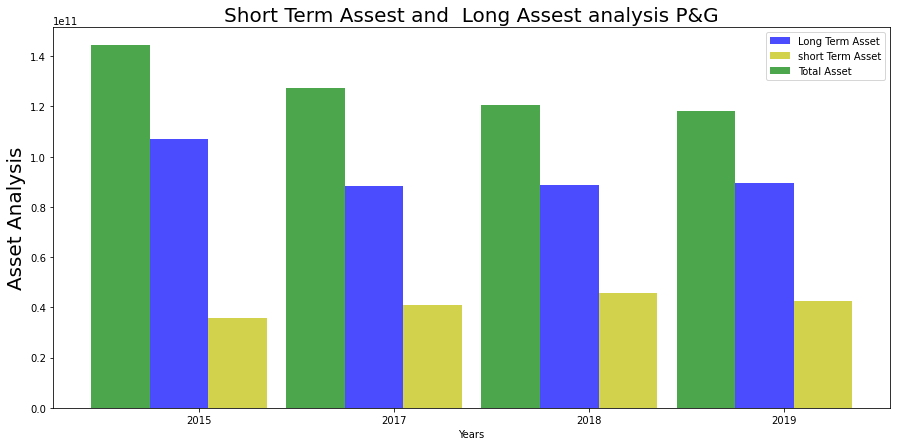

In [11]:
# Long Term Asset and Short-Term Asset
df['LongTermAsset'] = df['Property, Plant & Equipment Net'] +df['Goodwill and Intangible Assets']+df['Long-term investments']
# Long term Asset
n_year = 4
index = np.arange(n_year)
bar_width = 0.3
opacity = 0.7

print("Mean of Long Term assest for P&G last 5 year is {:.2f} ".format(df['LongTermAsset'].mean()))

print("Mean Percentage Long Term asset out of Total Asset for P&G last 5 year is {:.2f}% ".format((df['LongTermAsset'].mean()/df['Total assets'].mean())*100))


plt.figure(figsize=(15, 7))
plt.bar(index,df['LongTermAsset'],bar_width,alpha=opacity,color='b',label='Long Term Asset')
plt.bar(index+bar_width,df['ShortTermAssest'],bar_width,alpha=opacity,color='y',label='short Term Asset')
plt.bar(index-bar_width,df['Total assets'],bar_width,alpha=opacity,color='g',label='Total Asset')
plt.xlabel('Years')
plt.ylabel('Asset Analysis', fontsize=20)
plt.title('Short Term Assest and  Long Assest analysis P&G', fontsize=20)
plt.xticks(index+0.10, df.index)
plt.grid(False)
plt.legend()
plt.show();

# Importing the data again for modelling

In [12]:
df1=pd.read_csv("2015_Financial_Data.csv", index_col=0)
df2=pd.read_csv("2016_Financial_Data.csv", index_col=0)
df3=pd.read_csv("2017_Financial_Data.csv", index_col=0)
df4=pd.read_csv("2018_Financial_Data.csv", index_col=0)

In [13]:
df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df2.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df3.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df4.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)


In [14]:
df1.isnull().sum()

Revenue                  44
Revenue Growth          236
Cost of Revenue          74
Gross Profit             52
R&D Expenses            136
                       ... 
R&D Expense Growth      247
SG&A Expenses Growth    243
Sector                    0
PRICE_VAR                 0
Class                     0
Length: 224, dtype: int64

In [15]:
df_1= df1.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

df_2= df2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

df_3= df3.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

df_4= df4.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

In [16]:
df11 = df_1.join(df1['Sector'])

df22 = df_2.join(df2['Sector'])

df33 = df_3.join(df3['Sector'])

df44 = df_4.join(df4['Sector'])

In [17]:
data = pd.concat([df11, df22, df33, df44])

In [18]:
data.head()


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,Sector
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.018700,-0.021700,0.03590,0.031600,0.122800,0.0000,-0.1746,-9.323276,0,Consumer Defensive
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.158513,0.057855,0.11229,0.011648,1.059897,1.6484,1.7313,-25.512193,0,Consumer Defensive
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.061800,0.098100,0.18860,0.326800,0.273800,0.0000,0.0234,33.118297,1,Consumer Defensive
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.021100,-0.051000,-0.01890,0.196300,-0.045800,0.0000,-0.0060,2.752291,1,Consumer Defensive
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.0,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.025700,0.009000,0.02150,0.027400,0.102500,0.0000,-0.0220,12.897715,1,Consumer Defensive


In [19]:
data.shape

(17957, 224)

In [21]:
data.isnull().sum()

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Sector                  0
Length: 224, dtype: int64

C:\Users\nnama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


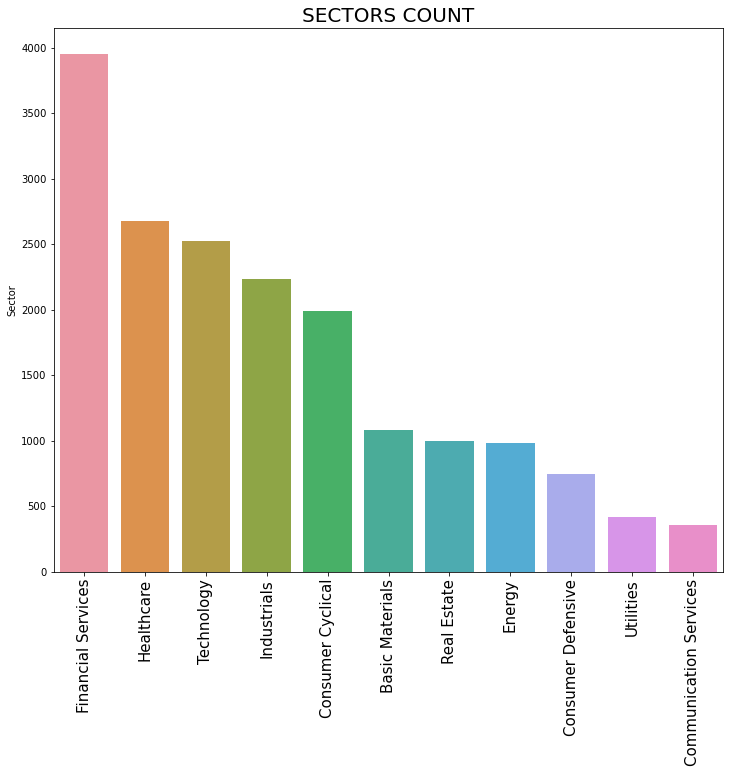

In [20]:
# Plot sector distribution
plt.figure(figsize=(12, 10))
df2sector = data['Sector'].value_counts()
sns.barplot(np.arange(len(df2sector)), df2sector)
plt.xticks(np.arange(len(df2sector)), df2sector.index.values.tolist(), rotation=90, fontsize=15)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

In [21]:
train = data.copy()

In [22]:
train.drop(['PRICE_VAR'], axis = 1, inplace = True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17957 entries, PG to ZYME
Columns: 223 entries, Revenue to Sector
dtypes: float64(221), int64(1), object(1)
memory usage: 30.7+ MB


# Using auto ML for feature selection 

In [24]:
from pycaret.classification import *
classification_setup = setup(data= train, target='Class',remove_outliers=True,normalize=True, remove_multicollinearity=True ,normalize_method='robust',
                            feature_selection=True, fix_imbalance = True, transformation = True, transformation_method = 'quantile', silent = True,session_id = 6563)

,Description,Value
0,session_id,6563
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(17957, 223)"
5,Missing Values,True
6,Numeric Features,221
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6774,0.7535,0.6821,0.6989,0.6903,0.3537,0.3539,5.5470
gbc,Gradient Boosting Classifier,0.6808,0.7494,0.6823,0.7034,0.6925,0.3608,0.3611,17.3260
xgboost,Extreme Gradient Boosting,0.6643,0.7293,0.6819,0.6814,0.6816,0.3265,0.3266,13.4570
rf,Random Forest Classifier,0.6565,0.7236,0.6389,0.6875,0.6622,0.3138,0.3148,6.6040
ada,Ada Boost Classifier,0.6555,0.7203,0.6572,0.6789,0.6678,0.3102,0.3105,6.2830
et,Extra Trees Classifier,0.6478,0.7163,0.6434,0.6737,0.6581,0.2953,0.2957,4.9660
qda,Quadratic Discriminant Analysis,0.6433,0.6930,0.6289,0.6732,0.6502,0.2872,0.2880,4.1150
lda,Linear Discriminant Analysis,0.6326,0.6885,0.6356,0.6564,0.6457,0.2643,0.2645,3.9550
lr,Logistic Regression,0.6341,0.6881,0.6389,0.6573,0.6479,0.2673,0.2675,4.7470
knn,K Neighbors Classifier,0.5963,0.6361,0.5695,0.6295,0.5980,0.1947,0.1957,6.7790


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6563, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
cb_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6884,0.7549,0.6755,0.7168,0.6955,0.3770,0.3777
1,0.6658,0.7332,0.6771,0.6850,0.6810,0.3301,0.3301
2,0.6568,0.7484,0.6683,0.6761,0.6722,0.3122,0.3122
3,0.6881,0.7545,0.6832,0.7126,0.6976,0.3759,0.3762
4,0.7046,0.7765,0.6969,0.7306,0.7133,0.4090,0.4095
5,0.6811,0.7617,0.6919,0.7000,0.6959,0.3608,0.3608
6,0.6655,0.7373,0.6557,0.6934,0.6740,0.3311,0.3317
7,0.6759,0.7601,0.6985,0.6906,0.6945,0.3495,0.3495
8,0.6864,0.7650,0.6985,0.7043,0.7014,0.3711,0.3711
9,0.6612,0.7435,0.6755,0.6799,0.6777,0.3206,0.3206


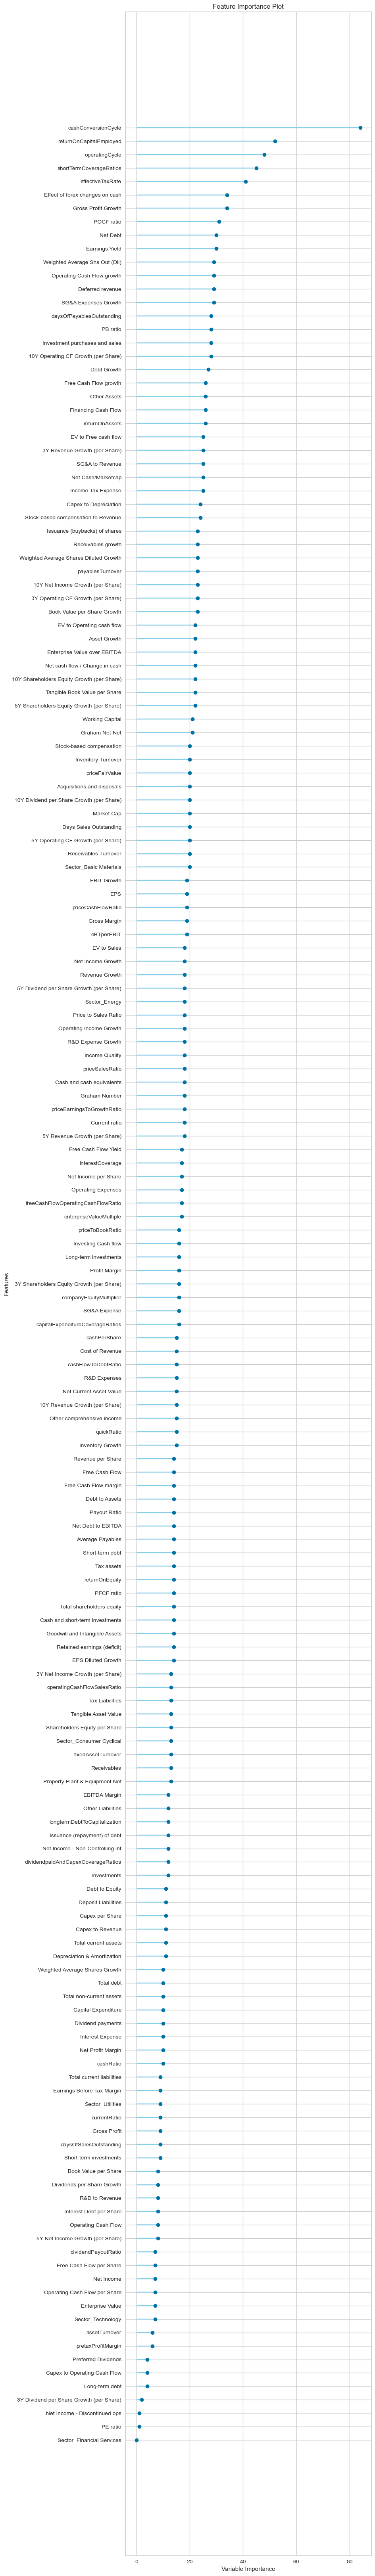

In [27]:
plot_model(cb_model, plot='feature_all')

# Using the selected features for modelling and evaluation on test data

In [32]:
data = train.loc[:,['effectiveTaxRate', 'returnOnCapitalEmployed', 'Sector', 'ROIC', 'SG&A Expenses Growth', 'Effect of forex changes on cash', 'shortTermCoverageRatios',
               'priceBookValueRatio', 'Issuance (buybacks) of shares', 'niperEBT', 'Weighted Average Shs Out (Dil)', 'Weighted Average Shares Diluted Growth',
               'EV to Free cash flow', 'Days Sales Outstanding', 'EV to Sales', 'EV to Operating cash flow', 'SG&A to Revenue', 'Receivables growth',
               'Free Cash Flow growth', 'Investment purchases and sales', 'Earnings Yield', '10Y Operating CF Growth (per Share)',
               'eBTperEBIT', 'Net Cash/Marketcap', 'Income Tax Expense', 'priceToOperatingCashFlowsRatio', 'daysOfPayablesOutstanding',
               'Operating Cash Flow growth', '10Y Net Income Growth (per Share)', 'PTB ratio', 'Class']]

In [34]:
data.head()

,effectiveTaxRate,returnOnCapitalEmployed,Sector,ROIC,SG&A Expenses Growth,Effect of forex changes on cash,shortTermCoverageRatios,priceBookValueRatio,Issuance (buybacks) of shares,niperEBT,...,10Y Operating CF Growth (per Share),eBTperEBIT,Net Cash/Marketcap,Income Tax Expense,priceToOperatingCashFlowsRatio,daysOfPayablesOutstanding,Operating Cash Flow growth,10Y Net Income Growth (per Share),PTB ratio,Class
PG,0.196702,0.0753,Consumer Defensive,0.0753,-0.1746,39000000.00,0.894400,3.03910,-3.911000e+09,0.803298,...,0.035500,0.953364,-0.1163,2.851000e+09,15.235800,41.5084,-0.0615,0.060300,0.00000,0
VIPS,0.225562,0.0000,Consumer Defensive,0.0000,1.7313,-15648692.28,87.179508,5.39614,1.767840e+06,0.774438,...,0.058316,0.935218,0.0956,3.955957e+07,24.243351,97.7945,0.2134,0.054066,5.92665,0
KR,0.330837,0.0859,Consumer Defensive,0.0859,0.0234,0.00,2.156307,3.35790,-4.130000e+08,0.669163,...,0.088900,0.836712,-0.5969,7.510000e+08,5.114700,18.1099,0.2095,0.227200,7.09820,1
RAD,0.003213,0.1062,Consumer Defensive,0.1062,-0.0060,0.00,14.276772,0.00000,3.321700e+07,0.996787,...,0.051300,0.370798,-0.8822,8.040000e+05,9.058900,18.4802,-0.1434,0.048000,0.00000,1
GIS,0.326218,0.1041,Consumer Defensive,0.1041,-0.0220,-29200000.00,1.075647,5.10040,-1.637200e+09,0.673782,...,0.078200,0.899538,-0.2376,8.833000e+08,13.116900,32.8385,-0.1316,0.077600,0.00000,1


In [35]:
data.shape

(17957, 31)

In [36]:
data.isnull().sum()

effectiveTaxRate                          0
returnOnCapitalEmployed                   0
Sector                                    0
ROIC                                      0
SG&A Expenses Growth                      0
Effect of forex changes on cash           0
shortTermCoverageRatios                   0
priceBookValueRatio                       0
Issuance (buybacks) of shares             0
niperEBT                                  0
Weighted Average Shs Out (Dil)            0
Weighted Average Shares Diluted Growth    0
EV to Free cash flow                      0
Days Sales Outstanding                    0
EV to Sales                               0
EV to Operating cash flow                 0
SG&A to Revenue                           0
Receivables growth                        0
Free Cash Flow growth                     0
Investment purchases and sales            0
Earnings Yield                            0
10Y Operating CF Growth (per Share)       0
eBTperEBIT                      

In [38]:
target_col = 'Class'
feature_col = [c for c in data.columns]

X = data[feature_col]
y = data[target_col]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
y.value_counts(normalize = True)

1    0.516122
0    0.483878
Name: Class, dtype: float64

In [40]:
 #changing the sector column to numeric
from category_encoders import TargetEncoder
encoder = TargetEncoder()
x_train['Sector Encoded'] = encoder.fit_transform(x_train['Sector'], x_train['Class'])
x_test['Sector Encoded'] = encoder.transform(x_test['Sector'])


# Dropping Sector and Class columns
x_train.drop(['Sector', 'Class'], axis = 1, inplace = True)
x_test.drop(['Sector', 'Class'], axis = 1, inplace = True)

#Applying standardization
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)


Accuracy =  0.6667594654788419
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1740
           1       0.68      0.67      0.67      1852

    accuracy                           0.67      3592
   macro avg       0.67      0.67      0.67      3592
weighted avg       0.67      0.67      0.67      3592



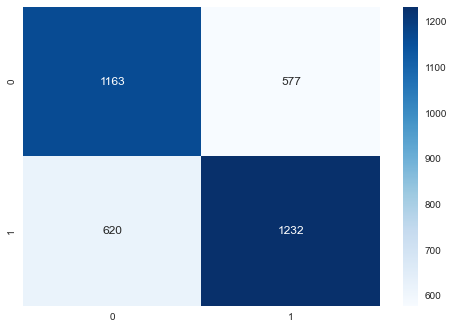

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100, max_features = 'sqrt')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues');
print(classification_report(y_test, y_pred))


Accuracy =  0.5885300668151447
              precision    recall  f1-score   support

           0       0.59      0.48      0.53      1740
           1       0.59      0.69      0.63      1852

    accuracy                           0.59      3592
   macro avg       0.59      0.59      0.58      3592
weighted avg       0.59      0.59      0.58      3592



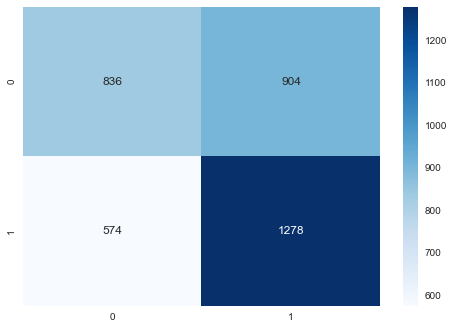

In [43]:
lin_model = LogisticRegression(solver='newton-cg')
lin_model.fit(x_train, y_train)
lin_model.score(x_test, y_test)

y_pred = lin_model.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues');
print(classification_report(y_test, y_pred))

Accuracy =  0.5100222717149221
              precision    recall  f1-score   support

           0       0.50      0.93      0.65      1740
           1       0.63      0.12      0.20      1852

    accuracy                           0.51      3592
   macro avg       0.56      0.52      0.42      3592
weighted avg       0.57      0.51      0.42      3592



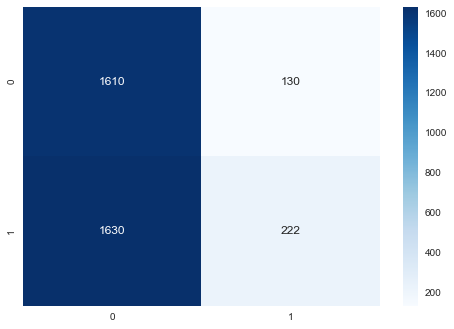

In [44]:
model = GaussianNB()

# Train the model using the training sets 
model.fit(x_train, y_train)

#Predict Score 
y_pred = model.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues');
print(classification_report(y_test, y_pred))

Accuracy =  0.6425389755011136
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1740
           1       0.64      0.69      0.66      1852

    accuracy                           0.64      3592
   macro avg       0.64      0.64      0.64      3592
weighted avg       0.64      0.64      0.64      3592



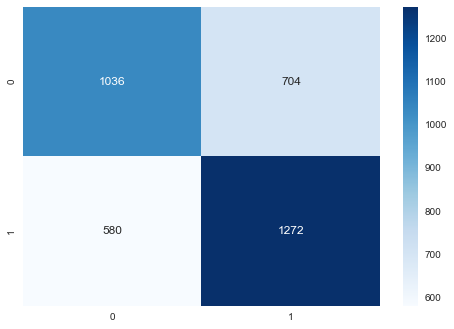

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb.fit(x_train, y_train)

#Predict Score 
y_pred = gb.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues');
print(classification_report(y_test, y_pred))

[04:49:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.6620267260579065
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1740
           1       0.67      0.68      0.67      1852

    accuracy                           0.66      3592
   macro avg       0.66      0.66      0.66      3592
weighted avg       0.66      0.66      0.66      3592



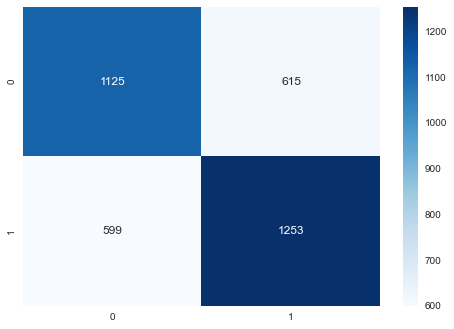

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

#Predict Score 
y_pred = xgb.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues');
print(classification_report(y_test, y_pred))

Accuracy is:  0.6121937639198218
              precision    recall  f1-score   support

           0       0.62      0.52      0.56      1740
           1       0.61      0.70      0.65      1852

    accuracy                           0.61      3592
   macro avg       0.61      0.61      0.61      3592
weighted avg       0.61      0.61      0.61      3592



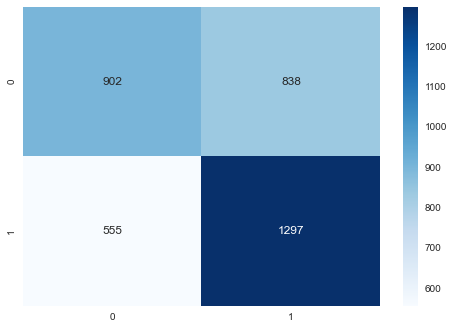

In [47]:
svc_model = SVC(kernel='rbf', C = 100, probability=True)
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

y_pred = svc_model.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues');
print(classification_report(y_test, y_pred))

In [48]:

# Comparing actual and predicted

y_pred1 = lin_model.predict(x_test)
y_pred2 = svc_model.predict(x_test)
y_pred3 = clf.predict(x_test)
y_pred4 = model.predict(x_test)
y_pred5 = gb.predict(x_test)
y_pred6 = xgb.predict(x_test)

df1 = pd.DataFrame({'Actual':y_test,'LR':y_pred1,
                  'SVC':y_pred2,'RF':y_pred3,'NB':y_pred4, 'GB':y_pred5, 'XGB':y_pred6})

In [49]:
df1

,Actual,LR,SVC,RF,NB,GB,XGB
SLCT,1,1,1,1,0,1,1
LTRX,0,1,1,0,0,1,0
AHH,1,1,1,1,0,1,1
XOM,1,0,0,0,1,1,1
VERU,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...
PEBO,1,0,1,1,0,1,1
TRNS,1,1,1,1,0,1,1
EEP,0,0,0,0,0,0,0
CINR,0,0,0,0,0,0,0


# Plotting ROC Curve

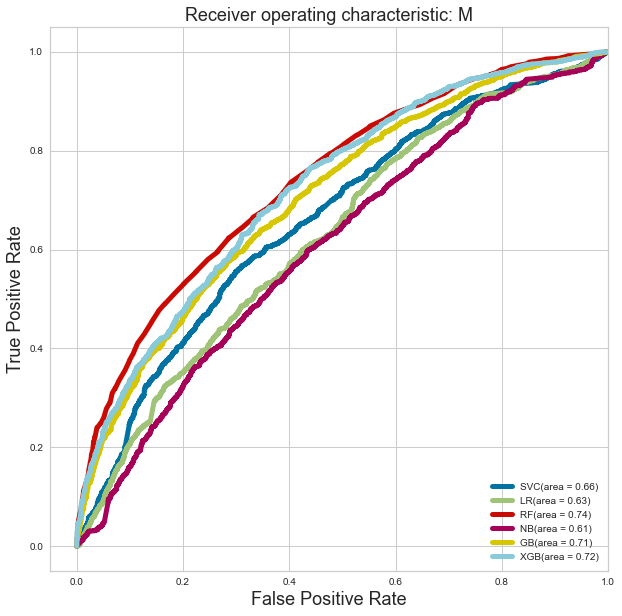

In [50]:
y_pred_proba_svc = svc_model.predict_proba(x_test)[:,1]
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test,  y_pred_proba_svc)
auc_svc = metrics.roc_auc_score(y_test, y_pred_proba_svc)

y_pred_proba_lin = lin_model.predict_proba(x_test)[:,1]
fpr_lin, tpr_lin, _ = metrics.roc_curve(y_test,  y_pred_proba_lin)
auc_lin = metrics.roc_auc_score(y_test, y_pred_proba_lin)


y_pred_proba_clf = clf.predict_proba(x_test)[:,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_pred_proba_clf)
auc_clf = metrics.roc_auc_score(y_test, y_pred_proba_clf)


y_pred_proba_nb = model.predict_proba(x_test)[:,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test,  y_pred_proba_nb)
auc_nb = metrics.roc_auc_score(y_test, y_pred_proba_nb)


y_pred_proba_gb = gb.predict_proba(x_test)[:,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  y_pred_proba_gb)
auc_gb = metrics.roc_auc_score(y_test, y_pred_proba_gb)


y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_xgb)



plt.figure(figsize=[10,10])
plt.plot(fpr_svc,tpr_svc,label="SVC(area = %0.2f)" %(auc_svc),linewidth=5)
plt.plot(fpr_lin,tpr_lin,label="LR(area = %0.2f)" %(auc_lin), linewidth=5)
plt.plot(fpr_clf,tpr_clf,label="RF(area = %0.2f)" %(auc_clf), linewidth=5)
plt.plot(fpr_nb,tpr_nb,label="NB(area = %0.2f)" %(auc_nb), linewidth=5)
plt.plot(fpr_gb,tpr_gb,label="GB(area = %0.2f)" %(auc_gb), linewidth=5)
plt.plot(fpr_xgb,tpr_xgb,label="XGB(area = %0.2f)" %(auc_xgb), linewidth=5)


plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()